In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Data load

In [3]:
#data=pd.read_table('datos/datos.txt')

In [4]:
data=pd.read_csv("Data//604ISISH.csv")
#data=pd.read_csv('datos Lag.csv')
data=data.rename(columns={'Unnamed: 0':'No'})
data=data.drop('No',axis=1)

In [5]:
data

,X,Y,Center,Peak,Width,RV,Sig
0,144.83,19.6,6556.792,73.97,0.780,-248.499450,NaN
1,143.49,19.6,6556.771,94.17,0.926,-249.458742,NaN
2,142.15,19.6,6556.704,101.40,0.970,-252.519340,NaN
3,140.81,19.6,6556.538,118.20,1.154,-260.102315,8.930295
4,139.46,19.6,6556.321,180.00,1.250,-270.015000,12.908692
...,...,...,...,...,...,...,...
581,77.78,0.0,6557.216,1077.00,0.842,-229.130888,NaN
582,76.44,0.0,6557.253,997.60,-0.841,-227.440706,NaN
583,75.10,0.0,6557.301,822.20,0.871,-225.248039,NaN
584,73.76,0.0,6557.292,597.80,0.878,-225.659164,NaN


In [6]:
data = data[['X', 'Y', 'RV']].copy()
data

,X,Y,RV
0,144.83,19.6,-248.499450
1,143.49,19.6,-249.458742
2,142.15,19.6,-252.519340
3,140.81,19.6,-260.102315
4,139.46,19.6,-270.015000
...,...,...,...
581,77.78,0.0,-229.130888
582,76.44,0.0,-227.440706
583,75.10,0.0,-225.248039
584,73.76,0.0,-225.659164


Bidimensional Data Display

(61.75399999999999, 148.786, -0.9800000000000001, 20.580000000000002)

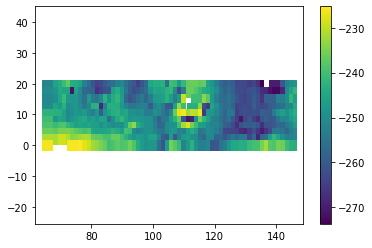

In [7]:
plt.scatter(data.X,data.Y,c=data.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

Second order Structure Function:
$$S_{2}(l)=\langle {\vert \overrightarrow{v}(\overrightarrow{x}+\overrightarrow{l})-\overrightarrow{v}(\overrightarrow{x}) \vert}^{2} \rangle \propto (\epsilon l)^{2 / 3} $$
applied to the bidimensional map (Turbulence case)

Data Rearrange

In [8]:
data.RV

0     -248.499450
1     -249.458742
2     -252.519340
3     -260.102315
4     -270.015000
          ...    
581   -229.130888
582   -227.440706
583   -225.248039
584   -225.659164
585   -226.161650
Name: RV, Length: 586, dtype: float64

In [9]:
df1=data
df1n=df1.to_numpy()

xl=[row[0] for row in df1n]
yl=[row[1] for row in df1n]
fl=[row[2] for row in df1n]

x1=[xl]
y1=[yl]
f1=[fl]

x=list(map(list, zip(*x1)))
y=list(map(list, zip(*y1)))
f=list(map(list, zip(*f1)))

Structure Function code

In [10]:
sig2=2*(data.RV.var())
fm=np.nanmean(f)
fv=np.nanvar(f,ddof=1)
fs=np.nanstd(f,ddof=1)
l=len(f)
S=[[fm],[fv],[fs],[l]]

In [11]:
a=[[0]*(l) for i in range(l)]
b=[[0]*(l) for i in range(l)]
c=[[0]*(2) for i in range(l*l)]

In [12]:
#Second Order Structure Function Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            a[i][j]=(((f[j][0])-(f[i][0]))**2)

#Normalized Second Order Structure Function Matrix [LxL]
#for i in range(l):
#    for j in range(l):
#        if i > j:
#            a[i][j]=(((f[j][0]-fm)-(f[i][0]-fm))**2)/(fv)       

In [13]:
#Coord Matrix [LxL]
for i in range(l):
    for j in range(l):
        if i > j:
            b[i][j]=((x[i][0]-x[j][0])**2+(y[i][0]-y[j][0])**2)**0.5 

In [14]:
#LxL to Lx2
#Main Matrix  [(L*L)x2]
for j in range (l):
    for i in range (l):
        c[i+j*(l)][1]=a[i][j]

for j in range (l):
    for i in range (l):
        c[i+j*(l)][0]=b[i][j]

In [15]:
c

[[0, 0],
 [1.3400000000000034, 0.9202411708839091],
 [2.680000000000007, 16.159518429292767],
 [4.02000000000001, 134.62648385895565],
 [5.3700000000000045, 462.91886982970897],
 [10.730000000000018, 633.5286615151014],
 [12.070000000000022, 330.5439511017414],
 [13.410000000000025, 224.49711140731014],
 [14.75, 276.4813473461892],
 [16.090000000000003, 216.358924181189],
 [17.430000000000007, 204.43334982352002],
 [18.780000000000015, 228.62254631718375],
 [20.12000000000002, 123.21841474078461],
 [21.460000000000008, 90.27962362358416],
 [22.80000000000001, 124.23464478594258],
 [24.140000000000015, 73.75284341105572],
 [25.480000000000018, 16.90238885345762],
 [26.820000000000007, 0.07512172826797633],
 [28.16000000000001, 8.816369494660162],
 [29.500000000000014, 137.82541745468075],
 [30.840000000000018, 122.20635812588787],
 [32.19000000000001, 147.64758342276],
 [33.530000000000015, 143.2404420319208],
 [34.87000000000002, 131.4651111311968],
 [36.21000000000001, 51.435429981873

In [16]:
d=np.asarray(c)
d

array([[ 0.        ,  0.        ],
       [ 1.34      ,  0.92024117],
       [ 2.68      , 16.15951843],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [17]:
ind=np.squeeze(d[:,1])>0.0
ind

array([False,  True,  True, ..., False, False, False])

In [18]:
e=d[ind]
e.min()

0.002086714670306809

In [19]:
df=pd.DataFrame(e)
df.describe()

,0,1
count,171156.000000,171156.000000
mean,28.851649,179.643694
std,17.753721,241.935430
min,1.340000,0.002087
25%,14.618126,18.832600
50%,25.358393,85.991425
75%,41.091902,244.070495
max,81.511560,2344.632607


In [20]:
#pd.DataFrame(a)

In [21]:
#pd.DataFrame(b)

In [22]:
#Filter: Greater than "0"
d=np.asarray(c)
ind=np.squeeze(d[:,1])>0.0
e=d[ind]

df=pd.DataFrame(e)
df.columns=['lag','qvd']#squared velocities difference
df.describe()

,lag,qvd
count,171156.000000,171156.000000
mean,28.851649,179.643694
std,17.753721,241.935430
min,1.340000,0.002087
25%,14.618126,18.832600
50%,25.358393,85.991425
75%,41.091902,244.070495
max,81.511560,2344.632607


In [23]:
df==0

,lag,qvd
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
171151,False,False
171152,False,False
171153,False,False
171154,False,False


In [24]:
df = df[~(df == 0).any(axis=1)]

In [25]:
df.columns=['lag','qvd']#squared velocities difference

df.describe()

,lag,qvd
count,171156.000000,171156.000000
mean,28.851649,179.643694
std,17.753721,241.935430
min,1.340000,0.002087
25%,14.618126,18.832600
50%,25.358393,85.991425
75%,41.091902,244.070495
max,81.511560,2344.632607


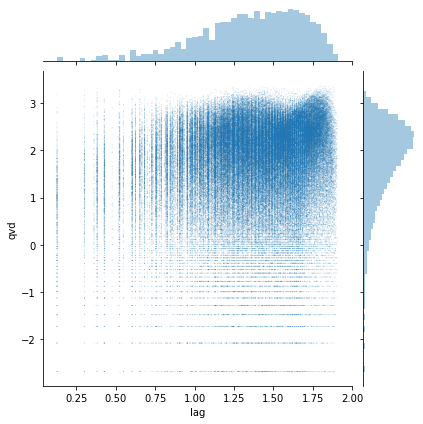

In [26]:
ax=sns.jointplot(x=np.log10(df.lag), y=np.log10(df.qvd), alpha=0.2, s=1, edgecolor='none')
ax.fig.set_size_inches(6,6)

Structure Function Data Groups

In [27]:
m=1#separation between lags valu=min lag

In [28]:
n=df.lag.max()//m#Number of points

In [29]:
n

81.0

In [30]:
#Grouping points
dfx=dict()

for i in range(int(n)):
    p=0+i*m
    q=m+i*m
    dfx[i]=df[df['lag'].between(p,q)]

In [31]:
dfx

{0: Empty DataFrame
 Columns: [lag, qvd]
 Index: [],
 1:          lag        qvd
 0       1.34   0.920241
 584     1.34   9.367262
 1168    1.34  57.501510
 1750    1.35  98.261307
 2913    1.34  48.847904
 ...      ...        ...
 171135  1.34   1.878043
 171141  1.34   7.764665
 171146  1.34   2.856712
 171150  1.34   4.807791
 171153  1.34   0.169024
 
 [921 rows x 2 columns],
 2:              lag         qvd
 1       2.680000   16.159518
 56      2.300000   48.211456
 57      2.661879    8.547183
 585     2.680000  113.285653
 639     2.661879   62.453283
 ...          ...         ...
 171129  2.680000   10.817529
 171136  2.680000   17.280084
 171142  2.680000   20.040808
 171147  2.680000   15.076514
 171151  2.680000    3.173893
 
 [1989 rows x 2 columns],
 3:              lag         qvd
 58      3.531629    3.858335
 642     3.531629  349.067717
 1221    3.531629  120.194765
 1225    3.539223  413.221673
 1804    3.531629  211.016935
 ...          ...         ...
 169265  3.34

In [32]:
#dfx = {k:v for (k,v) in dfx.items() if not v.empty}

In [33]:
dfx

{0: Empty DataFrame
 Columns: [lag, qvd]
 Index: [],
 1:          lag        qvd
 0       1.34   0.920241
 584     1.34   9.367262
 1168    1.34  57.501510
 1750    1.35  98.261307
 2913    1.34  48.847904
 ...      ...        ...
 171135  1.34   1.878043
 171141  1.34   7.764665
 171146  1.34   2.856712
 171150  1.34   4.807791
 171153  1.34   0.169024
 
 [921 rows x 2 columns],
 2:              lag         qvd
 1       2.680000   16.159518
 56      2.300000   48.211456
 57      2.661879    8.547183
 585     2.680000  113.285653
 639     2.661879   62.453283
 ...          ...         ...
 171129  2.680000   10.817529
 171136  2.680000   17.280084
 171142  2.680000   20.040808
 171147  2.680000   15.076514
 171151  2.680000    3.173893
 
 [1989 rows x 2 columns],
 3:              lag         qvd
 58      3.531629    3.858335
 642     3.531629  349.067717
 1221    3.531629  120.194765
 1225    3.539223  413.221673
 1804    3.531629  211.016935
 ...          ...         ...
 169265  3.34

In [34]:
len(dfx)

81

In [35]:
#test=dict()

#for i in range(len(dfx)):
#    test[i]=dfx[i]
#    continue
    

In [36]:
#test

Main Matrix Statistical Properties Groups

In [37]:
lgp=dict()
dl=dict()
dery=dict()
dfm=dict()
dfv=dict()
dfs=dict()
derx=dict()
dlm=dict()
dlv=dict()
dls=dict()

In [38]:
n=len(dfx)

for i in range(n):
    lgp[i]=(dfx[i]["lag"].max())
    dl[i]=len(dfx[i])#Numer of points each group
    #errorY
    dfm[i]=dfx[i]["qvd"].mean()
    dfv[i]=dfx[i]["qvd"].var()
    dfs[i]=dfx[i]["qvd"].std()
    #if dl[i]>0:
    dery[i]=dfs[i]/np.sqrt(dl[i])
    #errorX
    dlm[i]=dfx[i]["lag"].mean()
    dlv[i]=dfx[i]["lag"].var()
    dls[i]=dfx[i]["lag"].std()
    #if dl[i]>0:
    derx[i]=dls[i]/np.sqrt(dl[i])  
    


In [39]:
g=[[0]*(7) for i in range(n)]

for i in range(n):

    g[i][0]=lgp[i]
    g[i][1]=dfm[i]
    g[i][2]=dery[i]
    g[i][3]=dfs[i]
    g[i][4]=dfv[i]
    g[i][5]=dl[i]
    g[i][6]=derx[i]


In [40]:
dery

{0: nan,
 1: 4.798333985800053,
 2: 3.952869468820062,
 3: 4.907227559964688,
 4: 2.871507627194476,
 5: 2.837979595225999,
 6: 2.920632446477694,
 7: 3.162953521563828,
 8: 2.674397697120411,
 9: 2.850652994712816,
 10: 2.780433673025893,
 11: 3.204063308057972,
 12: 2.988855524510347,
 13: 2.815667817880008,
 14: 3.288111583337374,
 15: 3.4154144463729543,
 16: 3.3417238806670473,
 17: 3.4848400179350665,
 18: 4.153660705444731,
 19: 4.439206467345074,
 20: 3.8163164137923578,
 21: 4.122951396613837,
 22: 4.230356990381755,
 23: 5.013002580901545,
 24: 4.006798125833481,
 25: 4.327332207443857,
 26: 4.520240374290622,
 27: 5.041937831563675,
 28: 4.239695389771604,
 29: 4.182054823059515,
 30: 4.545056426411541,
 31: 4.742631550195995,
 32: 4.036829701459656,
 33: 4.068511588159632,
 34: 4.103906904742589,
 35: 4.79545365448798,
 36: 3.6115751953141997,
 37: 3.9953270188234056,
 38: 4.145420912068574,
 39: 4.413950434365989,
 40: 4.243194908562235,
 41: 4.220116841808592,
 42: 5.0658

In [41]:
sf=pd.DataFrame(g)
sf.columns=['Lag','Nmqvd','ErrY','StD','Var','# P','ErrX']
sf.describe()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
count,80.000000,80.000000,80.000000,80.000000,80.000000,81.000000,80.000000
mean,41.477824,191.968734,7.436439,246.379611,64157.689383,2133.530864,0.008408
std,23.231656,64.827504,5.486829,59.148189,30504.081088,1395.427919,0.008093
min,2.000000,45.801840,2.674398,126.317290,15956.057707,0.000000,0.003688
25%,21.746988,161.401137,4.060591,207.333577,42989.702453,944.000000,0.004816
50%,41.488682,180.822689,4.960115,242.825494,58977.671604,1941.000000,0.006145
75%,61.216187,230.840214,9.705412,282.320424,79720.188390,3162.000000,0.008428
max,80.989286,344.507671,36.150944,381.385073,145454.574122,5151.000000,0.065911


In [42]:
sf.dropna()

,Lag,Nmqvd,ErrY,StD,Var,# P,ErrX
1,2.000000,45.801840,4.798334,145.619753,21205.112325,921,0.010557
2,3.000000,67.960744,3.952869,176.290888,31078.477128,1989,0.005779
3,4.000000,82.736727,4.907228,180.903065,32725.919080,1359,0.007686
4,5.000000,87.532129,2.871508,161.979503,26237.359361,3182,0.005553
5,6.000000,93.332415,2.837980,154.350611,23824.111165,2958,0.004732
...,...,...,...,...,...,...,...
76,76.968004,129.102112,14.492039,226.372879,51244.680127,244,0.011915
77,77.960364,117.841321,16.162876,213.814748,45716.746506,175,0.024408
78,78.960043,90.717834,14.724239,150.158366,22547.534855,104,0.029788
79,79.965833,95.456060,12.759973,126.317290,15956.057707,98,0.024871


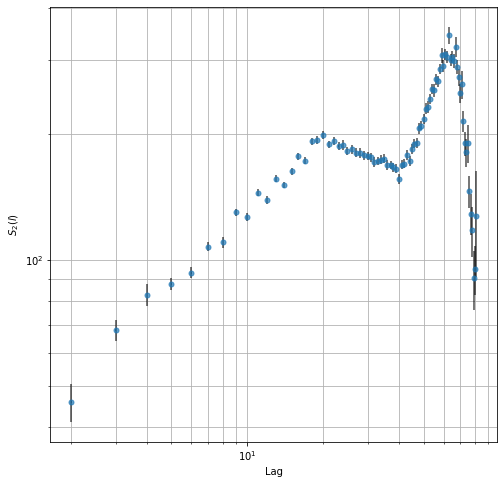

In [43]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=5)
ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="25"

In [44]:
print(df.lag.min())

1.339999999999975


In [45]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 9.356981992721558 seconds ---
